In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.ensemble import RandomForestClassifier

np.random.seed(5)

In [2]:
resultados_exames = pd.read_csv("data/exames.csv")
resultados_exames.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [3]:
valores_exames = resultados_exames.drop(columns =["id", "diagnostico"])
diagnostico = resultados_exames.diagnostico


In [4]:
valores_exames = resultados_exames.drop(columns =["id", "diagnostico"])
diagnostico = resultados_exames.diagnostico

valores_exames_v1 = valores_exames.drop(columns="exame_33")

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v1, diagnostico, test_size=0.3)

classficador = RandomForestClassifier(n_estimators=100)

classficador.fit(treino_x, treino_y)

print(classficador.score(teste_x, teste_y))

0.9707602339181286


In [5]:
from sklearn.dummy import DummyClassifier

In [6]:
classificador_bobo = DummyClassifier(strategy="most_frequent")

classificador_bobo.fit(treino_x, treino_y)
print(classificador_bobo.score(teste_x, teste_y))

0.6432748538011696


In [7]:
dados_plot = pd.concat([diagnostico, valores_exames_v1.iloc[:, 0:10]], axis=1)
dados_plot.head()

,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10
0,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419
1,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812
2,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069
3,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,0.10520,0.2597
4,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809


In [8]:
dados_plot = pd.melt(dados_plot, id_vars="diagnostico", var_name="exames", value_name="valores")

In [9]:
dados_plot

,diagnostico,exames,valores
0,M,exame_1,17.9900
1,M,exame_1,20.5700
2,M,exame_1,19.6900
3,M,exame_1,11.4200
4,M,exame_1,20.2900
...,...,...,...
5685,M,exame_10,0.1726
5686,M,exame_10,0.1752
5687,M,exame_10,0.1590
5688,M,exame_10,0.2397


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

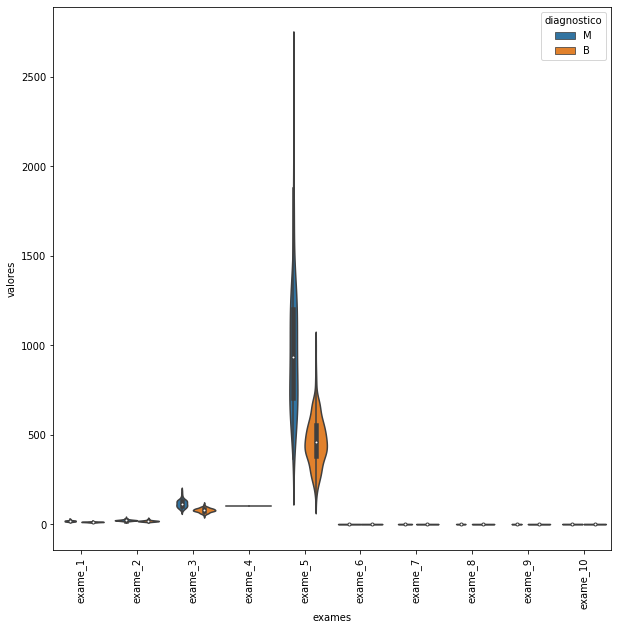

In [11]:
plt.figure(figsize=(10,10))
ax = sns.violinplot(x = "exames", y = "valores", hue= "diagnostico", data=dados_plot)
plt.xticks(rotation=90)
ax=ax

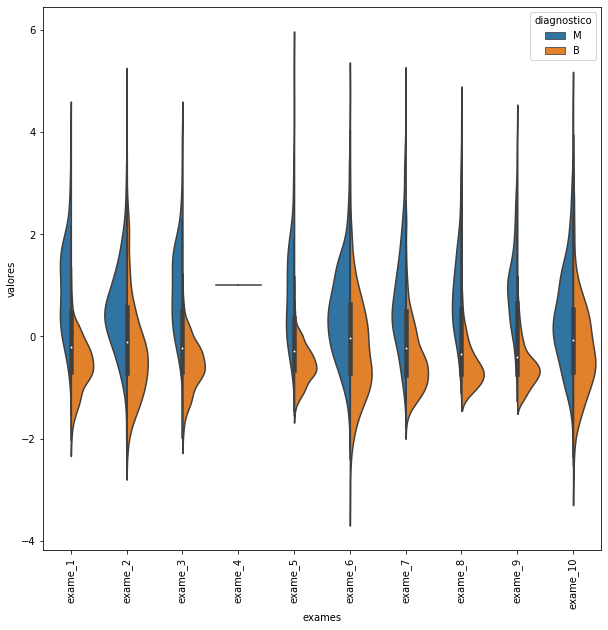

In [12]:
from sklearn.preprocessing import StandardScaler

padronizador = StandardScaler()
padronizador.fit(valores_exames_v1)
valores_exames_v2 = padronizador.transform(valores_exames_v1)
valores_exames_v2 = pd.DataFrame(data = valores_exames_v2, columns=valores_exames_v1.keys())

dados_plot = pd.concat([diagnostico, valores_exames_v2.iloc[:, 0:10]], axis=1)

dados_plot = pd.melt(dados_plot, id_vars="diagnostico", var_name="exames", value_name="valores")

plt.figure(figsize=(10,10))
ax = sns.violinplot(x = "exames", y = "valores", hue= "diagnostico", data=dados_plot, split=True)
plt.xticks(rotation=90)
ax=ax

In [13]:
valores_exames_v2.exame_4

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
564    1.0
565    1.0
566    1.0
567    1.0
568    1.0
Name: exame_4, Length: 569, dtype: float64

In [14]:
def grafico_violino(valores, inicio, fim):
    dados_plot = pd.concat([diagnostico, valores.iloc[:, inicio:fim]], axis=1)

    dados_plot = pd.melt(dados_plot, id_vars="diagnostico", var_name="exames", value_name="valores")

    plt.figure(figsize=(10,10))
    ax = sns.violinplot(x = "exames", y = "valores", hue= "diagnostico", data=dados_plot, split=True)
    plt.xticks(rotation=90)
    ax=ax
    

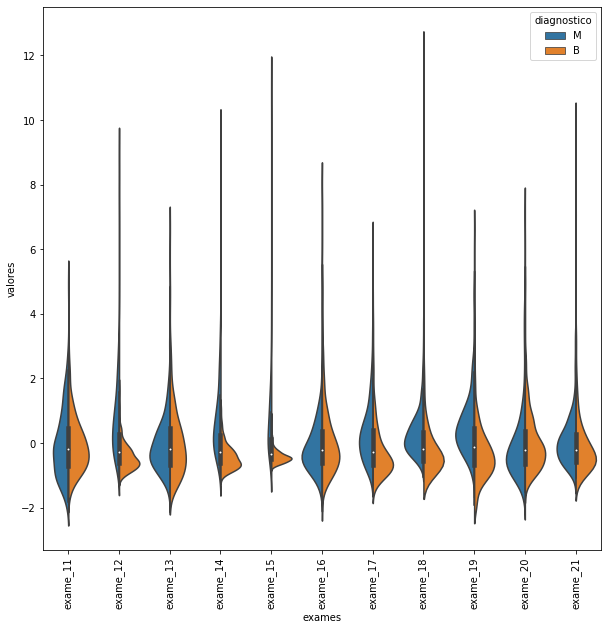

In [15]:
grafico_violino(valores_exames_v2, 10, 21)

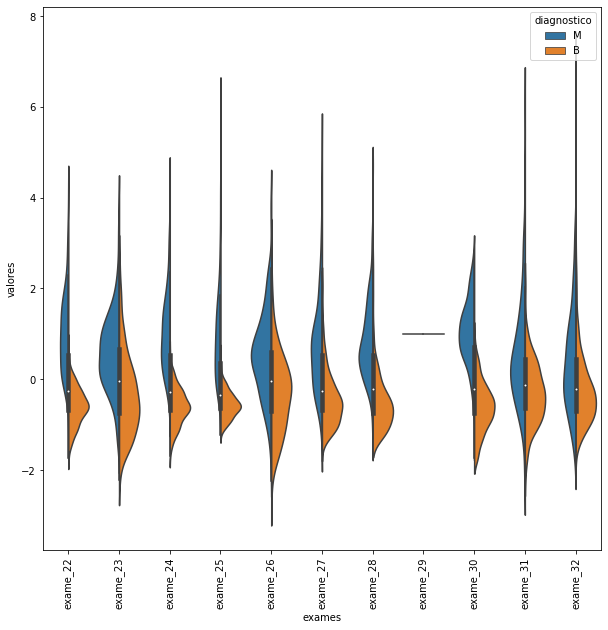

In [16]:
grafico_violino(valores_exames_v2, 21, 32)

In [17]:
valores_exames_v3 = valores_exames_v2.drop(columns=["exame_29", "exame_4"])

In [18]:
def classificar(valores):
    SEED = 1234
    np.random.seed(SEED)
    treino_x, teste_x, treino_y, teste_y = train_test_split(valores, diagnostico, test_size=0.3)
    classficador = RandomForestClassifier(n_estimators=100)

    classficador.fit(treino_x, treino_y)
    print(classficador.score(teste_x, teste_y))

In [19]:
classificar(valores_exames_v2)

0.9239766081871345


In [20]:
mapa_correlacao = valores_exames_v2.corr()

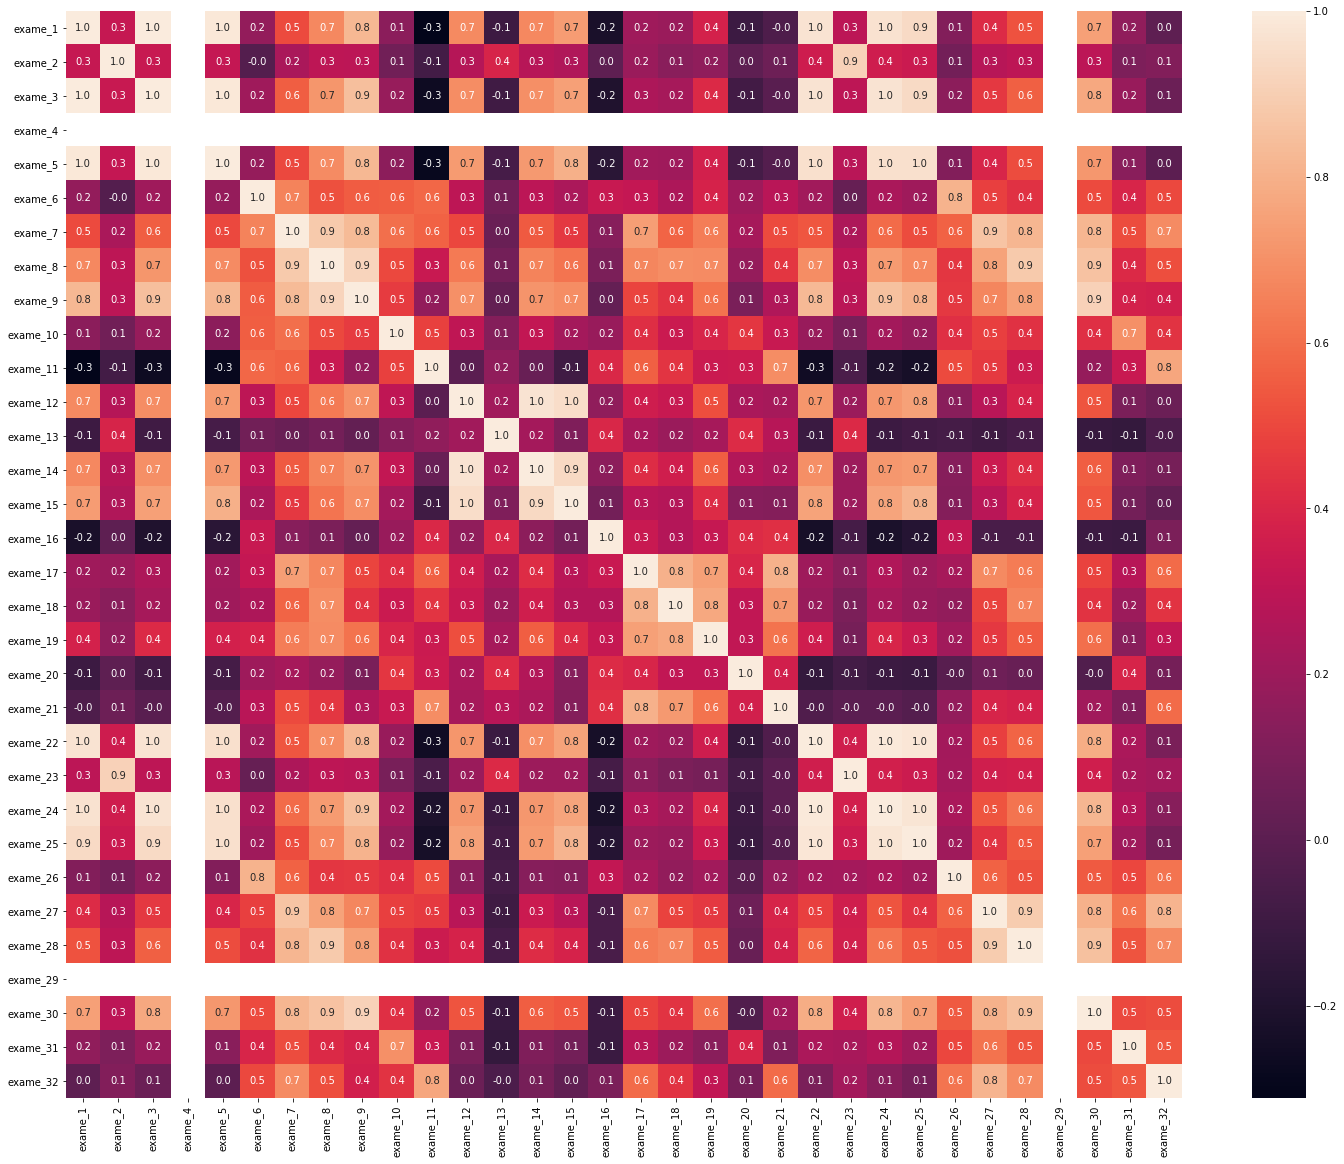

In [21]:

plt.figure(figsize=(25,20))
sns.heatmap(mapa_correlacao, annot=True, fmt=".1f")

In [22]:
mapa_correlacao_v1 = mapa_correlacao[mapa_correlacao > 0.99]

In [23]:
mapa_correlacao_v2 = mapa_correlacao_v1.sum()

In [24]:
mapa_correlacao_v3 = mapa_correlacao_v2[mapa_correlacao_v2 > 1]

In [25]:
mapa_correlacao_v3

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

In [26]:
valores_exames_v4 = valores_exames_v3.drop(columns=mapa_correlacao_v3.keys())

In [27]:
valores_exames_v4.head()

,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,...,exame_20,exame_21,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,...,1.148757,0.907083,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,...,-0.805450,-0.099444,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,...,0.237036,0.293559,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,...,4.732680,2.047511,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,...,-0.361092,0.499328,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [28]:
classificar(valores_exames_v4)

0.9181286549707602


In [29]:
valores_exames_v5 = valores_exames_v3.drop(columns=["exame_3", "exame_24"])

In [30]:
classificar(valores_exames_v5)

0.9298245614035088


In [31]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

selecionar_kmelhores = SelectKBest(chi2, k=5)

In [32]:
selecionar_kmelhores

SelectKBest(k=5, score_func=<function chi2 at 0x7f0c8f4f90d0>)

In [33]:
valores_exames_v6 = valores_exames_v1.drop(columns=["exame_4","exame_29", "exame_3", "exame_24"])

In [34]:
treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, diagnostico, test_size=0.3)
selecionar_kmelhores.fit(treino_x, treino_y)

SelectKBest(k=5, score_func=<function chi2 at 0x7f0c8f4f90d0>)

In [35]:
treino_kbest = selecionar_kmelhores.transform(treino_x)
teste_kbest = selecionar_kmelhores.transform(teste_x)

In [36]:
classificador = RandomForestClassifier(n_estimators=100, random_state=1234)

In [37]:
classificador.fit(treino_kbest, treino_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1234,
                       verbose=0, warm_start=False)

In [38]:
classificador.score(teste_kbest, teste_y)

0.9590643274853801

In [39]:
from sklearn.metrics import confusion_matrix

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_kbest))

[Text(33.0, 0.5, 'Real'), Text(0.5, 15.0, 'Predição')]

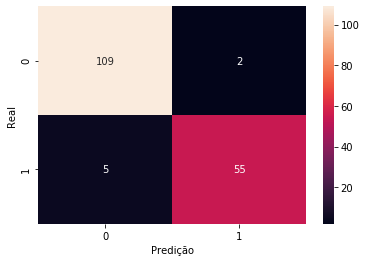

In [40]:
sns.heatmap(matriz_confusao, annot=True, fmt="d").set(xlabel="Predição", ylabel="Real")

In [41]:
from sklearn.feature_selection import RFE

0.9005847953216374


[Text(33.0, 0.5, 'Real'), Text(0.5, 15.0, 'Predição')]

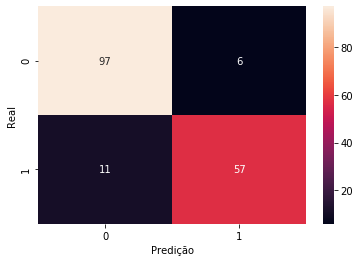

In [55]:
treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, diagnostico, test_size=0.3)
seletor_rfe = RFE(estimator=classificador, n_features_to_select=2, step=1)


seletor_rfe.fit(treino_x, treino_y)
treino_rfe = seletor_rfe.transform(treino_x)
teste_rfe = seletor_rfe.transform(teste_x)

classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_rfe, treino_y)

score = classificador.score(teste_rfe, teste_y)


matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfe))

print(score)


sns.heatmap(matriz_confusao, annot=True, fmt="d").set(xlabel="Predição", ylabel="Real")

0.9766081871345029


[Text(33.0, 0.5, 'Real'), Text(0.5, 15.0, 'Predição')]

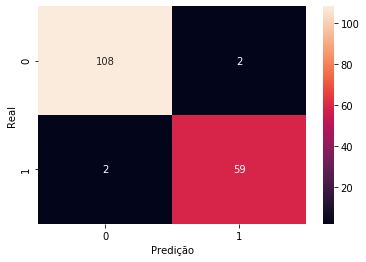

In [47]:
from sklearn.feature_selection import RFECV

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, diagnostico, test_size=0.3)
seletor_rfecv = RFECV(estimator=classificador, cv=5, step=1, scoring="accuracy")


seletor_rfecv.fit(treino_x, treino_y)
treino_rfecv = seletor_rfecv.transform(treino_x)
teste_rfecv = seletor_rfecv.transform(teste_x)

classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_rfecv, treino_y)

score = classificador.score(teste_rfecv, teste_y)


matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfecv))

print(score)


sns.heatmap(matriz_confusao, annot=True, fmt="d").set(xlabel="Predição", ylabel="Real")

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [52]:
# treino_x.columns[seletor_rfecv.support_]


array([0.85658228, 0.89683544, 0.92449367, 0.92452532, 0.92702532,
       0.92699367, 0.93955696, 0.93455696, 0.93955696, 0.93962025,
       0.93455696, 0.93708861, 0.93205696, 0.92952532, 0.93199367,
       0.93455696, 0.93708861, 0.93205696, 0.92952532, 0.93708861,
       0.93452532, 0.93702532, 0.93205696, 0.92949367, 0.93712025,
       0.94208861, 0.92952532, 0.93452532])

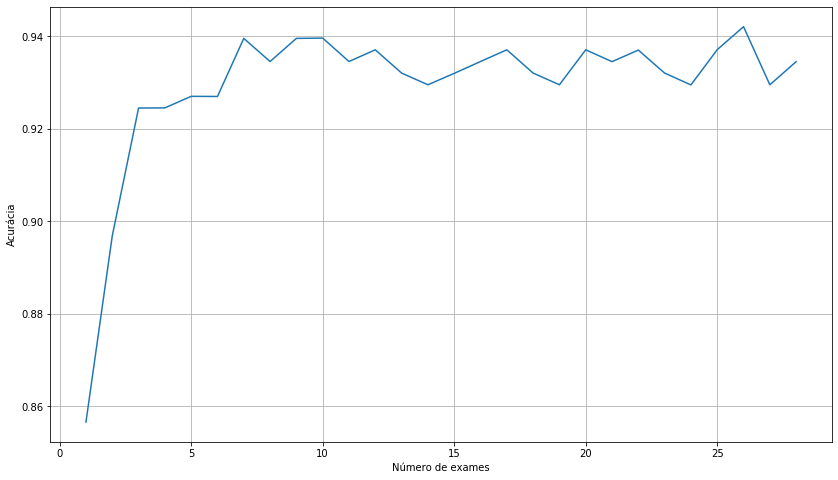

In [53]:
plt.figure(figsize=(14,8))
plt.xlabel("Número de exames")
plt.ylabel("Acurácia")
plt.grid()
plt.plot(range(1, len(seletor_rfecv.grid_scores_)+1), seletor_rfecv.grid_scores_)

In [54]:
resultados_exames

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.30010,...,184.60,2019.0,0.16220,0.66560,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.08690,...,158.80,1956.0,0.12380,0.18660,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.19740,...,152.50,1709.0,0.14440,0.42450,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.24140,...,98.87,567.7,0.20980,0.86630,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.19800,...,152.20,1575.0,0.13740,0.20500,0.4000,0.786,0.1625,0.2364,0.07678,0.854454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,103.78,1479.0,0.11100,0.11590,0.24390,...,166.10,2027.0,0.14100,0.21130,0.4107,0.786,0.2216,0.2060,0.07115,0.158771
565,926682,M,20.13,28.25,131.20,103.78,1261.0,0.09780,0.10340,0.14400,...,155.00,1731.0,0.11660,0.19220,0.3215,0.786,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,103.78,858.1,0.08455,0.10230,0.09251,...,126.70,1124.0,0.11390,0.30940,0.3403,0.786,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,103.78,1265.0,0.11780,0.27700,0.35140,...,184.60,1821.0,0.16500,0.86810,0.9387,0.786,0.2650,0.4087,0.12400,NaN


In [56]:
valores_exames_v7 = seletor_rfe.transform(valores_exames_v6)

In [57]:
valores_exames_v7.shape

(569, 2)

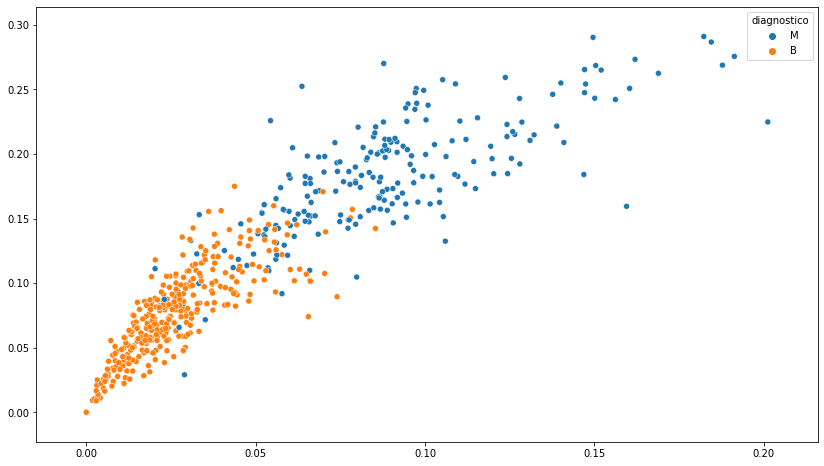

In [58]:
plt.figure(figsize=(14,8))
sns.scatterplot(x=valores_exames_v7[:, 0],y=valores_exames_v7[:, 1],hue=diagnostico)

In [63]:
from sklearn.decomposition import PCA
pca = PCA(n_components =2)
valores_exames_v8 = pca.fit_transform(valores_exames_v5)

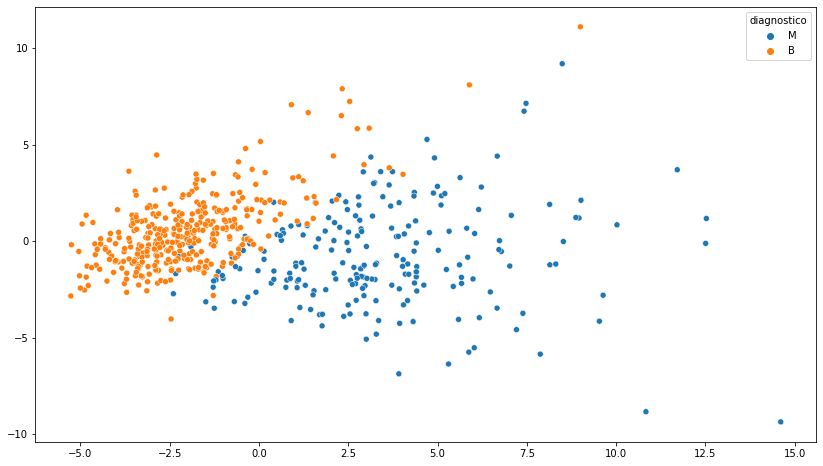

In [65]:
plt.figure(figsize=(14,8))
sns.scatterplot(x=valores_exames_v8[:, 0],y=valores_exames_v8[:, 1],hue=diagnostico)

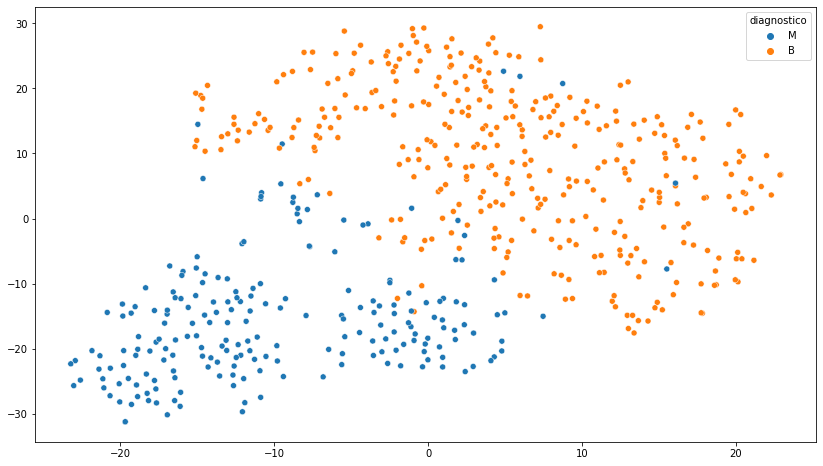

In [66]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components =2)
valores_exames_v9 = tsne.fit_transform(valores_exames_v5)

plt.figure(figsize=(14,8))
sns.scatterplot(x=valores_exames_v9[:, 0],y=valores_exames_v9[:, 1],hue=diagnostico)